# [降维学习](https://www.cnblogs.com/acm-jing/p/7528874.html)

**降维**
* 在高维情形下出现的数据样本稀疏、距离计算困难等问题，是所有机器学习方法共同面临的严重障碍，被称为“维数灾难”
* 缓解维数灾难的一个重要途径是**降维**，即通过某种数学变换将原始高维属性空间转为一个低维“子空间”
* 目前大部分降维算法处理向量表达的数据，也有一些降维算法处理高阶张量表达的数据。之所以使用降维后的数据表示是因为在原始的高维空间中，包含有冗余信息以及噪音信息，在实际应用例如图像识别中造成了误差，降低了准确率；而通过降维,我们希望 **减少冗余信息** 所造成的误差,提高识别（或其他应用）的精度。又或者希望通过降维算法来寻找数据内部的本质结构特征。
* **特征降维方法包括**：Lasso，PCA，小波分析，LDA，奇异值分解SVD，拉普拉斯特征映射，SparseAutoEncoder，局部线性嵌入LLE，等距映射Isomap。
<br>

</br>
EG：
例如一张512\*512的图只有中心100*100的区域内有非0值，剩下的区域就是没有用的信息，又或者一张图是成中心对称的，那么对称的部分信息就重复了。正确降维后的数据一般保留了原始数据的大部分的重要信息，它完全可以替代输入去做一些其他的工作，从而很大程度上可以减少计算量。例如降到二维或者三维来可视化。

**从什么角度出发来降维**

1. 提取特征子集做特征抽取
1. 通过线性/非线性的方式将原来高维空间变换到一个新的空间**(本章重点)**

## 主成分分析（PCA）

### PCA算法讲解
* 目标：提取最有价值的信息（基于方差，是让映射得到的点zizi尽可能的分开，即让N个zizi的方差尽可能大。）
* 若使用PCA将数据点投影至一维空间上时，PCA会选择2轴，这使得原本很容易区分的两簇点被揉杂在一起变得无法区分；而这时若选择1轴将会得 到很好的区分结果。
![](img/2.gif)

** PCA计算过程： **
1. 将原始数据按列组成n行m列矩阵X 
2. 将X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值 
3. 求出协方差矩阵$C=\frac{1}{m}XX^\mathsf{T}$ 
4. 求出协方差矩阵的特征值及对应的特征向量 
5. 将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P 
6. Y=PX即为降维到k维后的数据
![](img/3.PNG)

### PCA算法实例

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [32]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [8]:
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [9]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

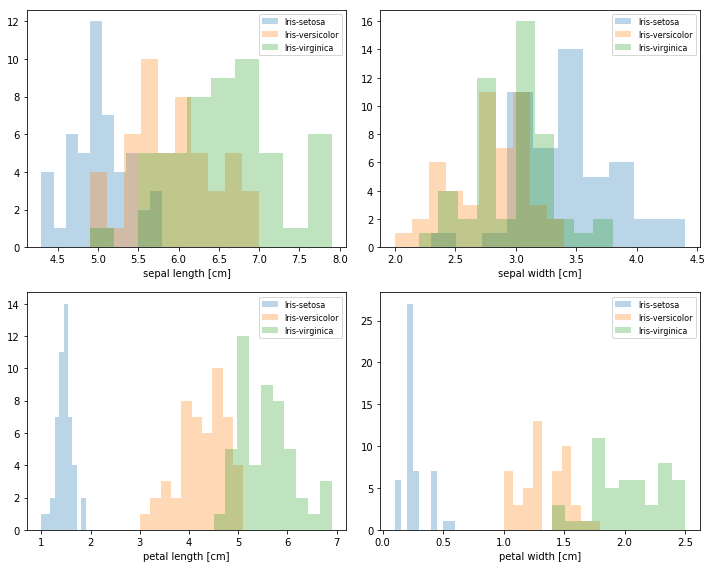

In [16]:
plt.figure(figsize=(10, 8))
for cnt in range(4):
    plt.subplot(2, 2, cnt+1)
    for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
        plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
    plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print (X_std)

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

In [18]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [19]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [20]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

Eigenvalues 
[2.92442837 0.93215233 0.14946373 0.02098259]


In [21]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print (eig_pairs)
print ('----------')
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

[(2.92442836911111, array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])), (0.9321523302535064, array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])), (0.14946373489813336, array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])), (0.020982592764270974, array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]
----------
Eigenvalues in descending order:
2.92442836911111
0.9321523302535064
0.14946373489813336
0.020982592764270974


In [22]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print (var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.6200333269203, 23.14740685864416, 3.711515564584526, 0.521044249851025]


array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

In [23]:
a = np.array([1,2,3,4])
print (a)
print ('-----------')
print (np.cumsum(a))

[1 2 3 4]
-----------
[ 1  3  6 10]


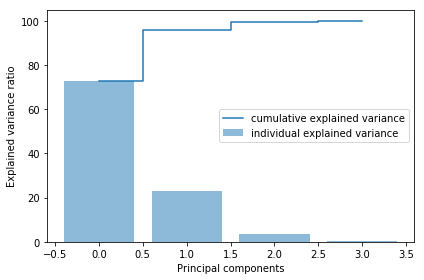

In [24]:
plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [25]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [28]:
Y = X_std.dot(matrix_w)
Y[:3]

array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316]])

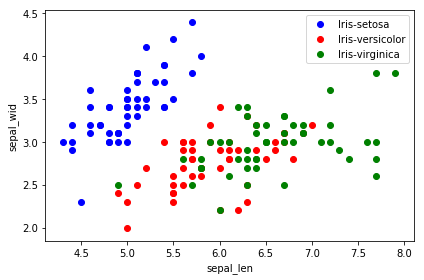

In [29]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(X[y==lab, 0],
                X[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

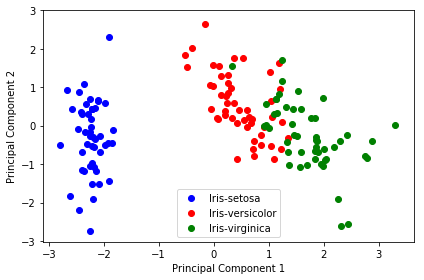

In [30]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

## 线性判别（LDA）

### [LDA算法讲解](http://www.cnblogs.com/zhangchaoyang/articles/2644095.html)
线性判别式分析（Linear Discriminant Analysis），简称为LDA。也称为Fisher线性判别（Fisher Linear Discriminant，FLD），是模式识别的经典算法，在1996年由Belhumeur引入模式识别和人工智能领域。
* 用途：数据预处理中的降维，分类任务
* 目标：LDA关心的是能够最大化类间区分度的坐标轴成分
将特征空间（数据集中的多维样本）投影到一个维度更小的 k 维子空间中，
同时保持区分类别的信息
* **基本思想：**是将高维的模式样本投影到最佳鉴别矢量空间，以达到抽取分类信息和压缩特征空间维数的效果，投影后保证模式样本在新的子空间有最大的类间距离和最小的类内距离，即模式在该空间中有最佳的可分离性。
![](img/4.PNG)
* 与PCA不同，更关心分类而不是方差
![](img/5.PNG)

### LDA算法实例

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [2]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [4]:
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [5]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

<img src="img/6.png" alt="FAO" width="690" align="mid">

In [7]:
from sklearn.preprocessing import LabelEncoder

X = df[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']].values
y = df['class'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

#label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

<img src="img/8.png" alt="FAO" width="290" align="mid">

* 分别求三种鸢尾花数据在不同特征维度上的均值向量 mi
<img src="img/9.png" alt="FAO" width="390">

In [11]:
import numpy as np
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.0041 3.4163 1.4653 0.2449]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



* 计算两个 4×4 维矩阵：类内散布矩阵和类间散布矩阵
 <img src="img/10.png" alt="FAO" width="330" >


In [12]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9472 13.6751 24.6201  5.6598]
 [13.6751 17.0281  8.1254  4.9169]
 [24.6201  8.1254 27.2158  6.2507]
 [ 5.6598  4.9169  6.2507  6.1736]]


<img src="img/12.png" alt="FAO" width="430" >

In [14]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 62.6649 -19.1924 163.3935  70.6115]
 [-19.1924  10.7842 -55.0015 -22.0477]
 [163.3935 -55.0015 431.0473 184.5397]
 [ 70.6115 -22.0477 184.5397  79.6021]]


-  <img src="img/13.png" alt="FAO" width="230" >

In [15]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.2051]
 [-0.3869]
 [ 0.5463]
 [ 0.714 ]]
Eigenvalue 1: 3.19e+01

Eigenvector 2: 
[[-0.0084]
 [-0.5891]
 [ 0.2545]
 [-0.7669]]
Eigenvalue 2: 2.77e-01

Eigenvector 3: 
[[ 0.8302]
 [-0.3909]
 [-0.3922]
 [ 0.0645]]
Eigenvalue 3: 2.09e-15

Eigenvector 4: 
[[ 0.2837]
 [ 0.2265]
 [ 0.2991]
 [-0.8824]]
Eigenvalue 4: -7.73e-15


特征值与特征向量：
- 特征向量：表示映射方向
- 特征值：特征向量的重要程度

In [16]:
#Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

31.87457939695731
0.276937486270037
7.731316211092013e-15
2.089400179758699e-15


In [17]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.14%
eigenvalue 2: 0.86%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [18]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2051 -0.0084]
 [-0.3869 -0.5891]
 [ 0.5463  0.2545]
 [ 0.714  -0.7669]]


In [20]:
X_lda = X.dot(W)

In [31]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom=False, top=False,  
            labelbottom=True, left=False, right=False, labelleft=True)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

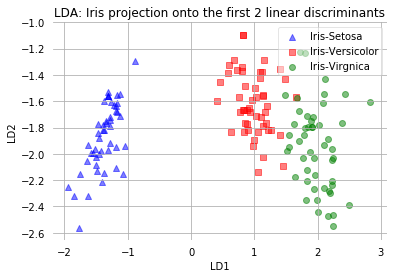

In [32]:
plot_step_lda()

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [36]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom=False, top=False,  
            labelbottom=True, left=False, right=False, labelleft=True)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

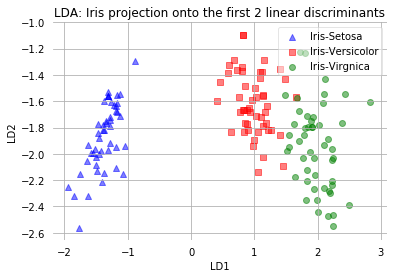

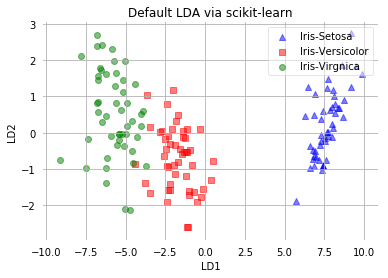

In [37]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

## 流形学习
* 流形学习的目的是找到**高维空间样本的低维描述**，它假设在高维空间中数据会呈现一种有规律的低维流形排列，但是这种规律排列不能直接通过高维空间的欧式距离来衡量，如下左图所示，某两点实际上的距离应该是下右图展开后的距离。如果能够有方法将高维空间中流形描述出来，那么在降维的过程中就能够保留这种空间关系，为了解决这个问题，流形学习假设高维空间的局部区域仍然具有欧式空间的性质，即它们的距离可以通过欧式距离算出(Isomap)，或者某点坐标能够由临近的节点线性组合算出(LLE)，从而可以获得高维空间的一种关系，而这种关系能够在低维空间中保留下来，从而基于这种关系表示来进行降维，因此流形学习可以用来压缩数据、可视化、获取有效的距离矩阵等。
![](img/1.PNG)

### 局部线性嵌入（LLE）

### LLE算法讲解
* ocally linear embedding（LLE）是一种非线性降维算法，它能够使降维后的数据较好地保持原有流形结构。LLE可以说是流形学习方法最经典的工作之一。很多后续的流形学习、降维方法都与LLE有密切联系。
* 见上图，使用LLE将三维数据映射到二维之后，映射后的数据仍能保持原有的数据流形（红色的点互相接近，蓝色的也互相接近），说明LLE有效地保持了数据原有的流行结构。

* 但是LLE在有些情况下也并**不适用**，如果数据分布在整个**封闭的球面**上，LLE则不能将它映射到二维空间，且不能保持原有的数据流形。那么我们在处理数据中，首先假设数据不是分布在闭合的球面或者椭球面上。

* LLE算法认为每一个数据点都可以由其近邻点的线性加权组合构造得到。算法的主要步骤分为三步：
<br>

</br>
1. 寻找每个样本点的k个近邻点；
1. 由每个样本点的近邻点计算出该样本点的局部重建权值矩阵；
1. 由该样本点的局部重建权值矩阵和其近邻点计算出该样本点的输出值。具体的算法流程如下图所示：
![](img/14.jpg)